# Import All Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Load the Data

In [2]:
# Load data from datasets directly
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 3s 0us/step


# Plot the images to see if Data Loading worked

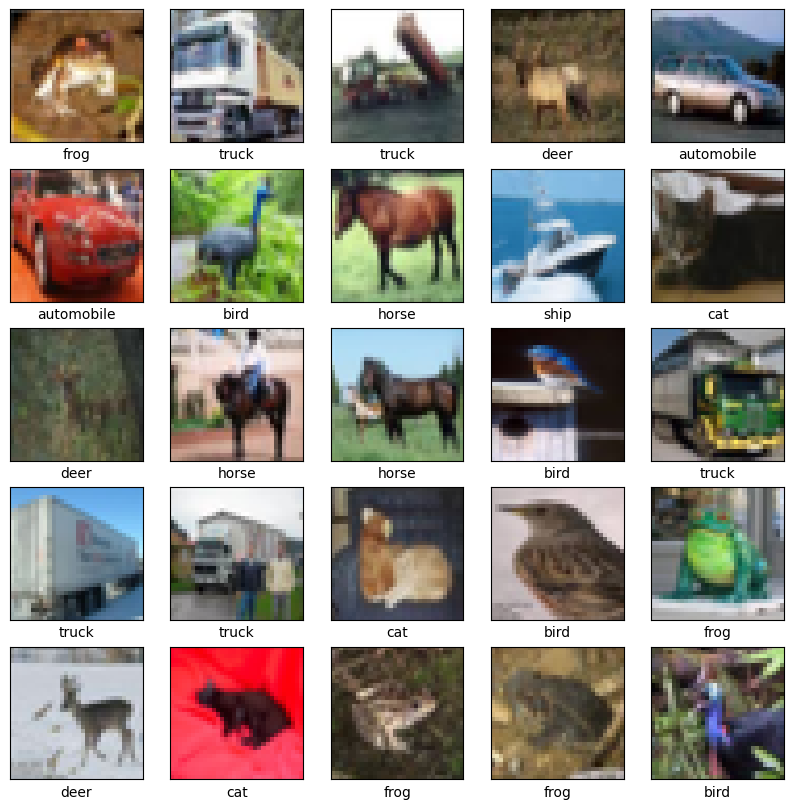

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



# ANN



In [4]:

# ANN Model
ann_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 images into 1D vectors
    layers.Dense(512, activation='relu'),     # First layer with 512 neurons and ReLU activation
    #layers.BatchNormalization(),             # Batch normalization, worsens accuracy
    layers.Dense(256, activation='relu'),     # Second layer with 256 neurons
    layers.Dense(128, activation='relu'),     # Third layer with 128 neurons
    layers.Dense(10)                          # Output layer, 10 neurons for 10 classes
])

ann_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])
# Train
ann_history=ann_model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels))
'''
UNCOMMENT TO SHOW TEST DIFFERENT LEARNING RATES
learning_rates = [0.01,0.001,0.0001,0.00001]
accuracies = []


# Compile
for i in learning_rates:

  print("Testing learning rate {}".format(i))
  ann_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=i),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])
  # Train
  ann_history=ann_model.fit(train_images, train_labels, batch_size=32, epochs=5, validation_data=(test_images, test_labels))
  # Get the accuracy from the last epoch
  final_accuracy = ann_history.history['accuracy'][-1]
  accuracies.append(final_accuracy)
  print(accuracies)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o')
plt.title('Model Accuracy for Different Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xscale('log')  # since learning rates vary exponentially
plt.xticks(learning_rates, labels=[str(lr) for lr in learning_rates])
plt.grid(True)
plt.show()
'''

Epoch 1/20
1563/1563 [==============================] - 52s 32ms/step - loss: 1.8323 - accuracy: 0.3405 - val_loss: 1.6734 - val_accuracy: 0.4103
Epoch 2/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6431 - accuracy: 0.4172 - val_loss: 1.5877 - val_accuracy: 0.4252
Epoch 3/20
1563/1563 [==============================] - 51s 33ms/step - loss: 1.5584 - accuracy: 0.4481 - val_loss: 1.5571 - val_accuracy: 0.4453
Epoch 4/20
1563/1563 [==============================] - 52s 34ms/step - loss: 1.5002 - accuracy: 0.4685 - val_loss: 1.4840 - val_accuracy: 0.4743
Epoch 5/20
1563/1563 [==============================] - 49s 32ms/step - loss: 1.4573 - accuracy: 0.4834 - val_loss: 1.4583 - val_accuracy: 0.4818
Epoch 6/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4124 - accuracy: 0.4985 - val_loss: 1.4393 - val_accuracy: 0.4881
Epoch 7/20
1563/1563 [==============================] - 47s 30ms/step - loss: 1.3785 - accuracy: 0.5117 - val_loss: 1.4121 -

'\nlearning_rates = [0.01,0.001,0.0001,0.00001]\naccuracies = []\n\n\n# Compile\nfor i in learning_rates:\n\n  print("Testing learning rate {}".format(i))\n  ann_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=i),\n                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),\n                    metrics=[\'accuracy\'])\n  # Train\n  ann_history=ann_model.fit(train_images, train_labels, batch_size=32, epochs=5, validation_data=(test_images, test_labels))\n  # Get the accuracy from the last epoch\n  final_accuracy = ann_history.history[\'accuracy\'][-1]\n  accuracies.append(final_accuracy)\n  print(accuracies)\n\n# Plotting\nplt.figure(figsize=(10, 6))\nplt.plot(learning_rates, accuracies, marker=\'o\')\nplt.title(\'Model Accuracy for Different Learning Rates\')\nplt.xlabel(\'Learning Rate\')\nplt.ylabel(\'Accuracy\')\nplt.xscale(\'log\')  # since learning rates vary exponentially\nplt.xticks(learning_rates, labels=[str(lr) for lr in learning_r

In [5]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Evaluating the model**

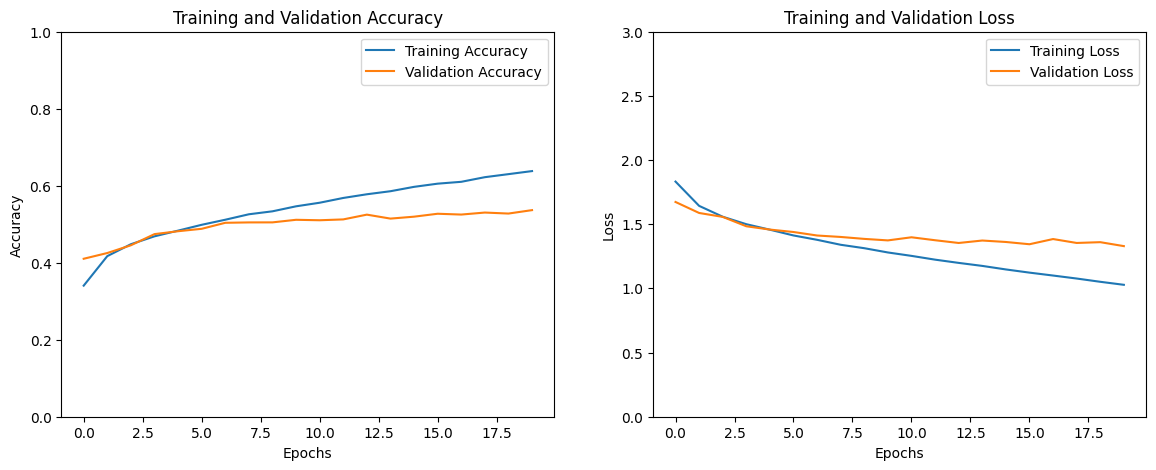

In [6]:
# Plotting the training history
plt.figure(figsize=(14, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend()

plt.show()

**Confusion Matrix**

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

    airplane       0.57      0.65      0.61      1000
  automobile       0.63      0.69      0.66      1000
        bird       0.42      0.42      0.42      1000
         cat       0.38      0.26      0.31      1000
        deer       0.48      0.37      0.42      1000
         dog       0.38      0.54      0.45      1000
        frog       0.60      0.56      0.58      1000
       horse       0.59      0.64      0.61      1000
        ship       0.73      0.61      0.67      1000
       truck       0.59      0.61      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.53     10000
weighted avg       0.54      0.54      0.53     10000



<Figure size 1400x500 with 0 Axes>

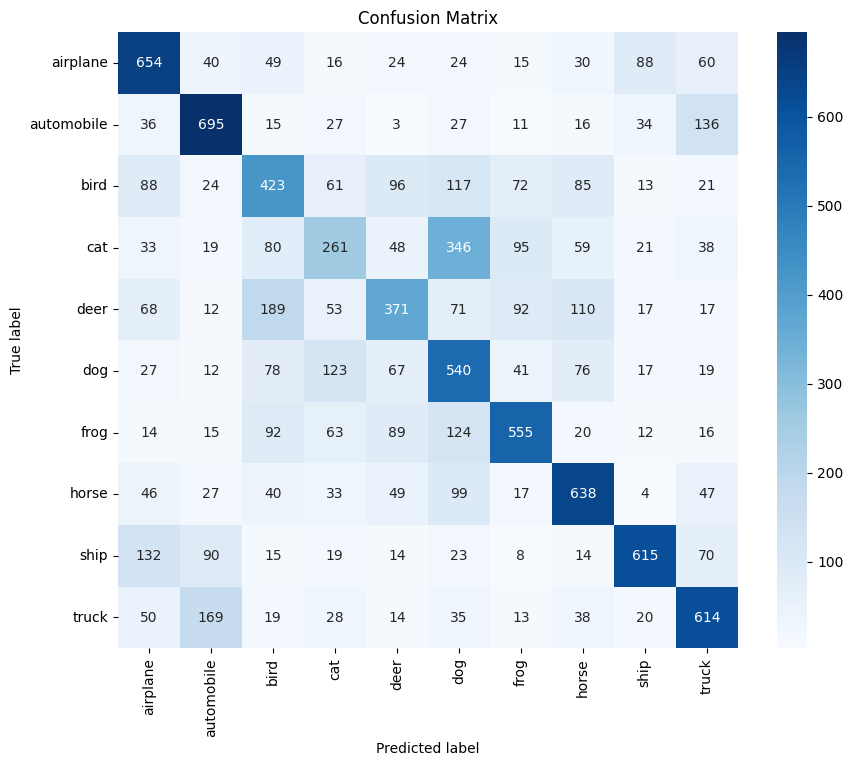

In [7]:
# Generate predictions
predictions = ann_model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)


# Detailed evaluation metrics
print(classification_report(test_labels, predicted_classes, target_names=class_names))

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Plotting the training history
plt.figure(figsize=(14, 5))

plt.show()

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# CNN

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))   # add 2D convolutional layer with 32 filters of size 3x3 for the input shape of images 32x32x3
model.add(layers.BatchNormalization()) # normalize activations of previous layer
model.add(layers.MaxPooling2D((2, 2))) # add max pooling layer with 2x2 pool size to reduce spatial dimensions

model.add(layers.Conv2D(64, (3, 3), activation='relu')) # add another 2D convolutional layer with 64 filters of size 3x3
model.add(layers.BatchNormalization()) # normalize activations of previous layer
model.add(layers.MaxPooling2D((2, 2))) # add another max pooling layer with 2x2 pool size to reduce spatial dimensions
model.add(layers.Dropout(0.5)) # prevent overfitting with dropout layer

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu')) # add another 2D convolutional layer with 128 filters of size 3x3, "same" padding keeps dimensions unchanged after layer
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu')) # add another similar convolutional layer as above
model.add(layers.BatchNormalization()) # normalize activations of previous layer
model.add(layers.MaxPooling2D((2, 2))) # add another max pooling with 2x2 pool size to further reduce spatial dimensions
model.add(layers.Dropout(0.5)) # prevent overfitting with dropout layer

model.add(layers.Flatten()) # flattening output of all layers to 1D vector
model.add(layers.Dense(64, activation='relu')) # add dense layer with 64 neurons and ReLu activation
model.add(layers.Dense(10)) # add output layer with 10 neurons for 10 different classes

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                      

In [10]:
'''
UNCOMMENT TO SHOW TEST DIFFERENT LEARNING RATES

# Testing different learning rates to find the optimal one
learning_rates = [0.01,0.001,0.0001,0.00001]
accuracies = []

for i in learning_rates:
  print("Testing learning rate {}".format(i))
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=i),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])


  history = model.fit(train_images, train_labels, batch_size=32,
                      epochs=5,
                      validation_data=(test_images, test_labels))
    # Get the accuracy from the last epoch
  final_accuracy = history.history['accuracy'][-1]
  accuracies.append(final_accuracy)
  print(accuracies)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o')
plt.title('Model Accuracy for Different Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xscale('log')  # since learning rates vary exponentially
plt.xticks(learning_rates, labels=[str(lr) for lr in learning_rates])
plt.grid(True)
plt.show()
'''

'\n# Testing different learning rates to find the optimal one\nlearning_rates = [0.01,0.001,0.0001,0.00001]\naccuracies = []\n\nfor i in learning_rates:\n  print("Testing learning rate {}".format(i))\n  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=i),\n                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),\n                metrics=[\'accuracy\'])\n\n\n  history = model.fit(train_images, train_labels, batch_size=32,\n                      epochs=5,\n                      validation_data=(test_images, test_labels))\n    # Get the accuracy from the last epoch\n  final_accuracy = history.history[\'accuracy\'][-1]\n  accuracies.append(final_accuracy)\n  print(accuracies)\n\n# Plotting\nplt.figure(figsize=(10, 6))\nplt.plot(learning_rates, accuracies, marker=\'o\')\nplt.title(\'Model Accuracy for Different Learning Rates\')\nplt.xlabel(\'Learning Rate\')\nplt.ylabel(\'Accuracy\')\nplt.xscale(\'log\')  # since learning rates vary exponentially\

**Train the Model**

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.008, momentum=0.9),
 #             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  #            metrics=['accuracy'])


history = model.fit(train_images, train_labels, batch_size=32,
                    epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 187s 118ms/step - loss: 1.5659 - accuracy: 0.4333 - val_loss: 1.3104 - val_accuracy: 0.5161
Epoch 2/20
1563/1563 [==============================] - 180s 115ms/step - loss: 1.2004 - accuracy: 0.5730 - val_loss: 1.2075 - val_accuracy: 0.5825
Epoch 3/20
1563/1563 [==============================] - 179s 114ms/step - loss: 1.0391 - accuracy: 0.6333 - val_loss: 0.9173 - val_accuracy: 0.6717
Epoch 4/20
1563/1563 [==============================] - 178s 114ms/step - loss: 0.9440 - accuracy: 0.6714 - val_loss: 0.8862 - val_accuracy: 0.6905
Epoch 5/20
1563/1563 [==============================] - 180s 115ms/step - loss: 0.8812 - accuracy: 0.6897 - val_loss: 0.9197 - val_accuracy: 0.6805
Epoch 6/20
1563/1563 [==============================] - 181s 116ms/step - loss: 0.8334 - accuracy: 0.7083 - val_loss: 0.8802 - val_accuracy: 0.6977
Epoch 7/20
1563/1563 [==============================] - 183s 117ms/step - loss: 0.7882 - accuracy: 0.7278 - val_

**Evaluate the model**

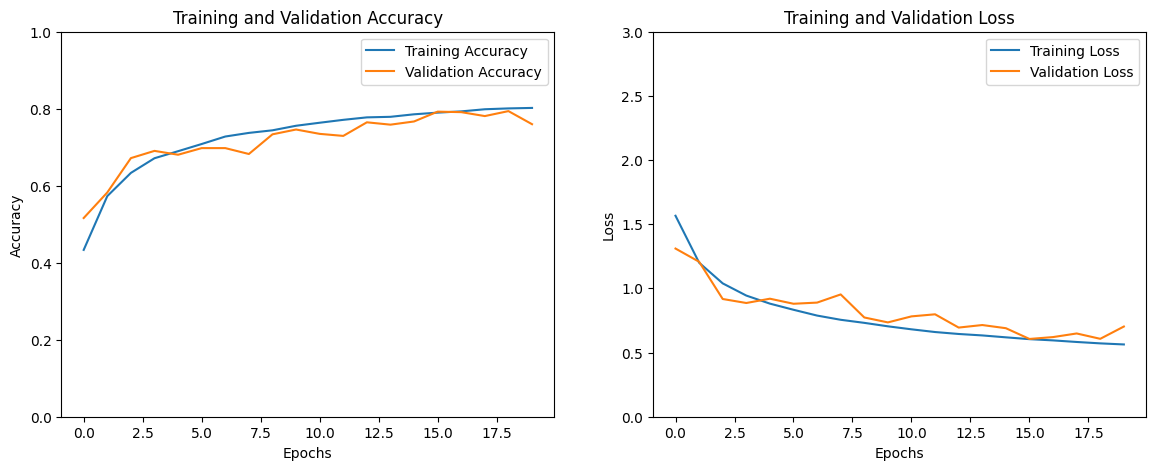

In [12]:
# Plotting the training history
plt.figure(figsize=(14, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend()

plt.show()

**Confusion Matrix**

313/313 [==============================] - 9s 27ms/step
              precision    recall  f1-score   support

    airplane       0.89      0.67      0.76      1000
  automobile       0.97      0.73      0.83      1000
        bird       0.82      0.59      0.69      1000
         cat       0.65      0.53      0.59      1000
        deer       0.61      0.90      0.73      1000
         dog       0.67      0.73      0.70      1000
        frog       0.84      0.83      0.84      1000
       horse       0.90      0.76      0.82      1000
        ship       0.78      0.91      0.84      1000
       truck       0.68      0.94      0.78      1000

    accuracy                           0.76     10000
   macro avg       0.78      0.76      0.76     10000
weighted avg       0.78      0.76      0.76     10000



<Figure size 1400x500 with 0 Axes>

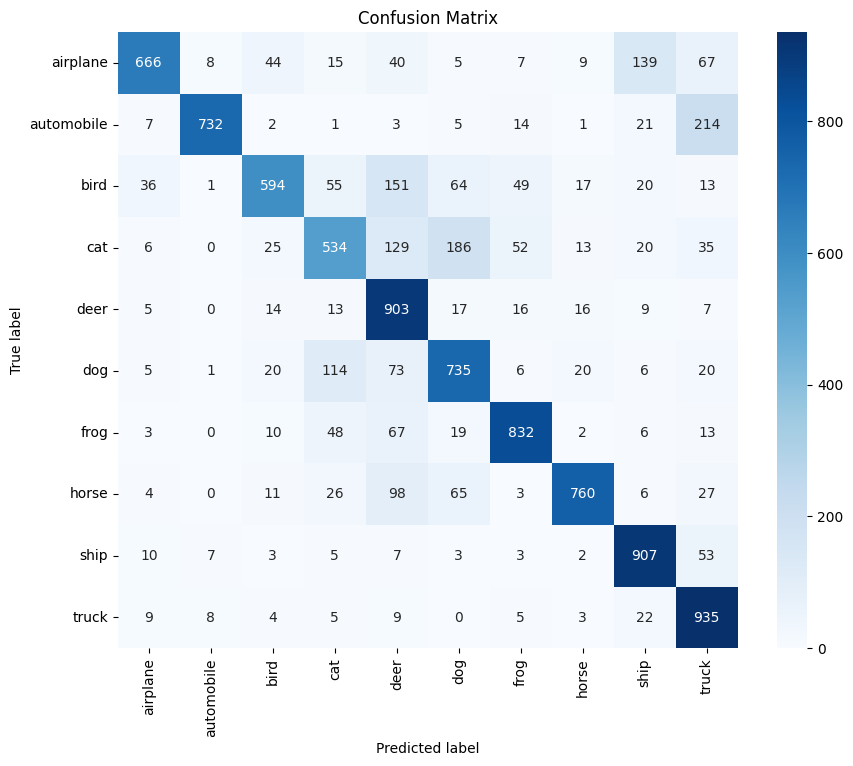

In [13]:
# Generate predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)


# Detailed evaluation metrics
print(classification_report(test_labels, predicted_classes, target_names=class_names))

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Plotting the training history
plt.figure(figsize=(14, 5))

plt.show()

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()